# Определение определяющих успешность игры закономерностей

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import statistics as stat
from scipy import stats as st
import numpy as np

# 1. Введение

## 1.1 Описание данных
параметры датасета:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## 1.2 Описание проекта
**Задание:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Подготовка данных

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.1. Неявные дубли и визуальное ознакомление с уникальными значениями

In [7]:
# проверим дубли, связанные с различием в регистре
if len(sorted(df['name'].str.lower().unique().astype(str))) == len(sorted(df['name'].unique().astype(str))):   
    print('дублей в названиях связанных с различием в регистре нет')
else:
    print('есть дубли в названиях, связанные с различием в регистре')    

дублей в названиях связанных с различием в регистре нет


In [8]:
# поищем глазами неявные дубли в названиях
sorted(df['name'].str.lower().unique().astype(str))

[' beyblade burst',
 ' fire emblem fates',
 " frozen: olaf's quest",
 ' haikyu!! cross team match!',
 ' tales of xillia 2',
 "'98 koshien",
 '.hack//g.u. vol.1//rebirth',
 '.hack//g.u. vol.2//reminisce',
 '.hack//g.u. vol.2//reminisce (jp sales)',
 '.hack//g.u. vol.3//redemption',
 '.hack//infection part 1',
 '.hack//link',
 '.hack//mutation part 2',
 '.hack//outbreak part 3',
 '.hack//quarantine part 4: the final chapter',
 '.hack: sekai no mukou ni + versus',
 '007 racing',
 '007: quantum of solace',
 '007: the world is not enough',
 '007: tomorrow never dies',
 '1 vs. 100',
 '1/2 summer +',
 '10 minute solution',
 '100 all-time favorites',
 '100 classic books',
 '100 classic games',
 '1000 cooking recipes from elle à table',
 '1001 touch games',
 '101-in-1 explosive megamix',
 '101-in-1 party megamix wii',
 '101-in-1 sports megamix',
 '101-in-1 sports party megamix',
 '1080°: teneighty snowboarding',
 '11eyes: crossover',
 '12-sai. honto no kimochi',
 '12-sai. koisuru diary',
 '12ri

Визуальный поиск неявных дублей в названиях не выявил

In [9]:
# поищем глазами неявные дубли в названиях 
sorted(df['platform'].str.lower().unique().astype(str))

['2600',
 '3do',
 '3ds',
 'dc',
 'ds',
 'gb',
 'gba',
 'gc',
 'gen',
 'gg',
 'n64',
 'nes',
 'ng',
 'pc',
 'pcfx',
 'ps',
 'ps2',
 'ps3',
 'ps4',
 'psp',
 'psv',
 'sat',
 'scd',
 'snes',
 'tg16',
 'wii',
 'wiiu',
 'ws',
 'x360',
 'xb',
 'xone']

Визуальный поиск неявных дублей в названии платформы не выявил

In [10]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

в значениях годов присутствуют пропуски. поэтому поменять на другой тип без замены не получится. а прпуски убирать не будем.

In [11]:
# поищем глазами неявные дубли в названиях 
sorted(df['genre'].str.lower().unique().astype(str))

['action',
 'adventure',
 'fighting',
 'misc',
 'nan',
 'platform',
 'puzzle',
 'racing',
 'role-playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

неявных дублей в названиях не выявлено

In [12]:
# посмотрим на уникальные значения critic_score
sorted(df['critic_score'].unique())

[76.0,
 nan,
 13.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0]

Среди значений critic_score присутсвуют NaN

In [13]:
# посмотрим на уникальные значения critic_score
df['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.9       2
0.2       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Видно, что:
- NaN  -  6701 записей. 
- tbd  -  2424 записей.

присутствует значение 'tbd', из-за чего преобразование во float может упасть. надо это учесть

In [14]:
# посмотрим на уникальные значения rating
df['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Проверим, есть ли игры с продажами в Сервеной Америке, но без рейтинга

In [15]:
print('Всего игр с нулевыми продажами в Севернй Америке и без рейтинга ESRB:', len(df[(df['rating'].isna()) & (df['na_sales']==0)]))
print('Всего игр с НЕ нулевыми продажами в Севернй Америке и без рейтинга ESRB:', len(df[(df['rating'].isna()) & (df['na_sales']!=0)]))

Всего игр с нулевыми продажами в Севернй Америке и без рейтинга ESRB: 3732
Всего игр с НЕ нулевыми продажами в Севернй Америке и без рейтинга ESRB: 3034


видимо это принятые в ESRB обозначения. так же видно, что присутствуют NaN. Посмотрим как пропуски рейтингов распределены по годам.

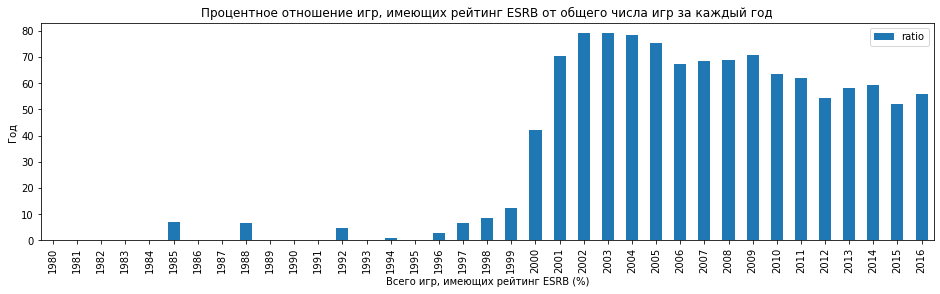

In [16]:
# сделаем сводку по годам. в столбце esrb_not_rated - количество 
esrb_not_rated = df.loc[df['rating'].isna(),'year_of_release'].value_counts().rename('esrb_not_rated', inplace = True).sort_index()
total = df['year_of_release'].rename('total', inplace = True).value_counts()
compared_by_esrb = pd.concat((esrb_not_rated,total), axis=1)
compared_by_esrb['ratio'] = (compared_by_esrb['total'] - compared_by_esrb['esrb_not_rated'])/compared_by_esrb['total']*100
compared_by_esrb.index = compared_by_esrb.index.astype(int, copy=False)
compared_by_esrb['ratio'] = compared_by_esrb['ratio'].round(1)
ax = compared_by_esrb.plot(kind='bar', 
                           y = 'ratio', 
                           figsize=(16,4),
                           title= 'Процентное отношение игр, имеющих рейтинг ESRB от общего числа игр за каждый год')
ax.set(xlabel = 'Всего игр, имеющих рейтинг ESRB (%)', ylabel = 'Год')
plt.show()

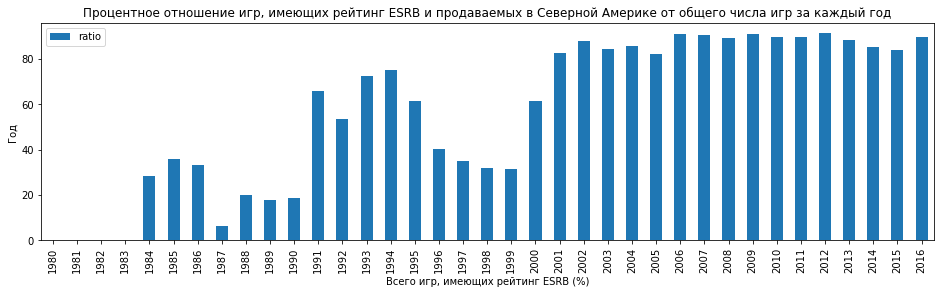

In [17]:
df[(df['rating'].isna()) & (df['na_sales']!=0)]
esrb_not_rated_sold_in_na = df.loc[(df['rating'].isna()) & (df['na_sales']!=0),'year_of_release'].value_counts().rename('esrb_not_rated', inplace = True).sort_index()
#total = df['year_of_release'].rename('total', inplace = True).value_counts()
compared_by_esrb_sold_in_na = pd.concat((esrb_not_rated_sold_in_na,total), axis=1)
compared_by_esrb_sold_in_na['ratio'] = (compared_by_esrb_sold_in_na['total'] - compared_by_esrb_sold_in_na['esrb_not_rated'])/compared_by_esrb_sold_in_na['total']*100
compared_by_esrb_sold_in_na['ratio'] = compared_by_esrb_sold_in_na['ratio'].round(1)
compared_by_esrb_sold_in_na.index = compared_by_esrb_sold_in_na.index.astype(int, copy=False)
ax = compared_by_esrb_sold_in_na.plot(kind='bar', 
                           y = 'ratio', 
                           figsize=(16,4),
                           title= 'Процентное отношение игр, имеющих рейтинг ESRB и продаваемых в Северной Америке от общего числа игр за каждый год')
ax.set(xlabel = 'Всего игр, имеющих рейтинг ESRB (%)', ylabel = 'Год')
plt.show()

Вывод по анализу срезов:
1. В датасете приведены продажи по регионам, в то время как ESRB - рейтинг для игр в США. И соответсвенно сделать вывод что если игра продается в США то начиная с определнного года у нее обязательно есть рейтинг ESRB мы не можем. (информации об обязательности рейтнга я так же не нашел в описаниях)
2. из 6766 игр без рейтинга (за весь период продаж) только 3034 продавалось на территории Северной Америки (и не факт, что именно в США)

"Выводы по графикам":
1. Количество игр, имеющих рейтинг ESRB и продажи в Северной америке, начиная с 2000-го года превысило 80% и это значение удерживалось на протяжении всего исследуемого периода.
2. Срди игр, имеющих рейтинг ESRB и продажи в Северной америке, всплеск соотношения к общему числу игр произошел в 1991 г, в то время как если не учитывать продажи в Северной Америке (первый график) то  - в 2000м.
3. Графики имеют различные формы, что говорит что начиная с 2004-го количество игр, которые не продавались в Северной Америке стало расти. (есть спад на первом графике, и спада нет на втором)

Общий вывод по ESRB:
1. возможно, если бы была информация по продажам по странам в Северной Америке (не только по США), стало бы видно, что например в Канаде или Мексике могут продаваться игры без указанного рейтинга ESRB, а в США нет
2. решение о присовении рейтингов было принтяо в 1994 г. соответсвенно, от года выпуска наличие рейтинга тоже зависит.

**Итого, необходимо:**
1. в поле 'rating' значения "K-A" и "EC" слить с "Е"
2. пропуски в столбце 'rating' заменить на явное значение. например "not_rated_in_US"
3. tbd - заменить  на NaN (выполнено в п.2.2)

In [18]:
# замена по п.1 и п.2
df.loc[df['rating'].isin(['K-A','EC']), 'rating'] = 'E'
df.loc[df['rating'].isna(), 'rating'] = 'not_rated_in_US'
# проверка по п.1 и п.2
df['rating'].value_counts(dropna = False)

not_rated_in_US    6766
E                  4001
T                  2961
M                  1563
E10+               1420
RP                    3
AO                    1
Name: rating, dtype: int64

## 2.2. Изменение типов

Какие типы будем менять / не менять и почему:

1. year_of_release - оставляем float (т.е. не меняем на int), т.к. есть пропуски а их, думаю, убирать не стоит
2. user_score - float, c заменой на значения 'tbd' на NaN
3. для остальных столбцов типы оставляем, т.к. или это изначально численные типы с десятичным значением, или str с пропусками (NaN, как это в 'rating')

In [19]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [20]:
# проверка  замены
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

## 2.2. Суммарные продажи по всем регионам

In [21]:
# добавим столбец:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# 3 исследовательский анализ данных

# 3.1. Сколько игр выпускалось в разные годы

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Количество выпущенных игр')]

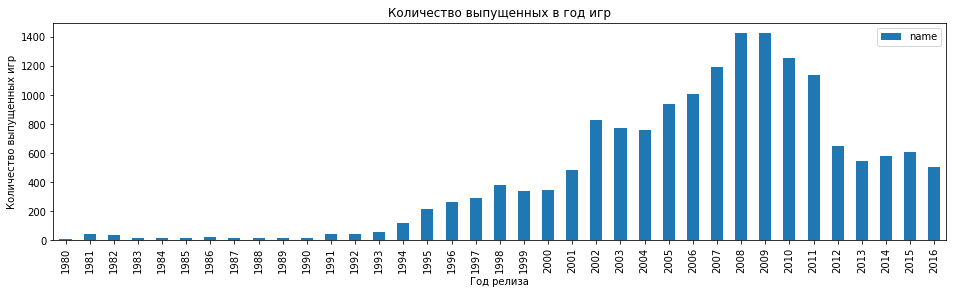

In [22]:
release_ammount = df.pivot_table(index = 'year_of_release', values = 'name' ,  aggfunc = 'count')
release_ammount.index = release_ammount.index.astype(int, copy=False)
ax = release_ammount.plot(kind = 'bar', figsize=(16,4), title='Количество выпущенных в год игр' )
ax.set(xlabel = 'Год релиза', ylabel = 'Количество выпущенных игр')

Выглядит, как будто для прогноза на 2017 имеет смысл брать только период не ранее 2012. Возможно стоит еще его сократить.

## 3.2. Продажи по платформам

In [23]:
top_10_platforms_by_sales = df.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(10) # топ-10 платформ по продажам
top_10_platforms_by_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

In [24]:
# сделаем срез по топ-10 плафторм по продажам
# сделаем "сводник" где по вертикали - платформы, по горизонтали - годы, а в ячейках - количество продаж (но это не важно)
# посчитаем по каждой строке (т.е. для каждой платформы) и получим описание
df[df['platform'].isin(top_10_platforms_by_sales.index)]\
.pivot_table(index ='platform', columns = 'year_of_release',  values = 'name' ,  aggfunc = 'count')\
.count(axis = 1).describe() 

count    10.000000
mean     11.700000
std       5.598611
min       4.000000
25%      10.250000
50%      11.000000
75%      12.000000
max      26.000000
dtype: float64

**вывод для платформ из топ-10:**
- среднее время жизни платформы -11.7 лет (примрно равно медиане)
- половина всех платформ  существует 10-12 лет

Посмотрим как развивались продажи по годам в мире для каждой из топ-10 платформ

[Text(0.5, 0, 'Год выпуска'), Text(0, 0.5, 'Суммарный объем продаж')]

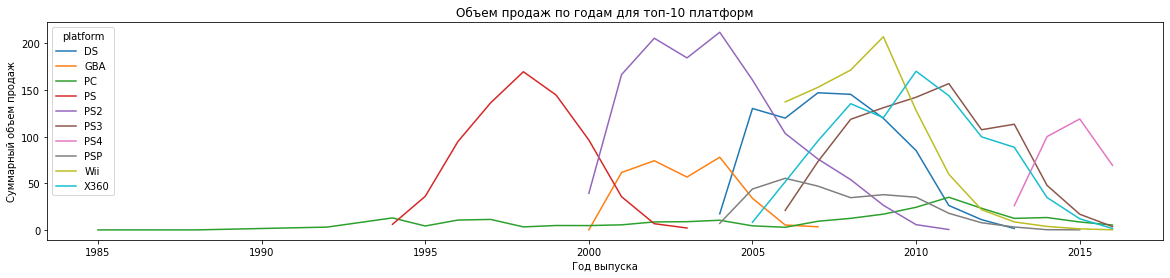

In [25]:
sales_by_ears = df[df['platform'].isin(top_10_platforms_by_sales.index)]\
.pivot_table(index ='platform', columns = 'year_of_release',  values = 'sum_sales' ,  aggfunc = 'sum')

ax = sales_by_ears.T.plot(figsize = (20,4),title = 'Объем продаж по годам для топ-10 платформ')
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

In [26]:
sales_by_ears_t = sales_by_ears.T
sales_by_ears_t

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992.0,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


видно, что для платформы 'DS' в 1985 году есть 1-е значение, далее есть перерыв в 21 год, что выглядит как невалидное значение (шум). Которое может испортить статистику. Затрем его

Посмотрим на это черех тепловую карту

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

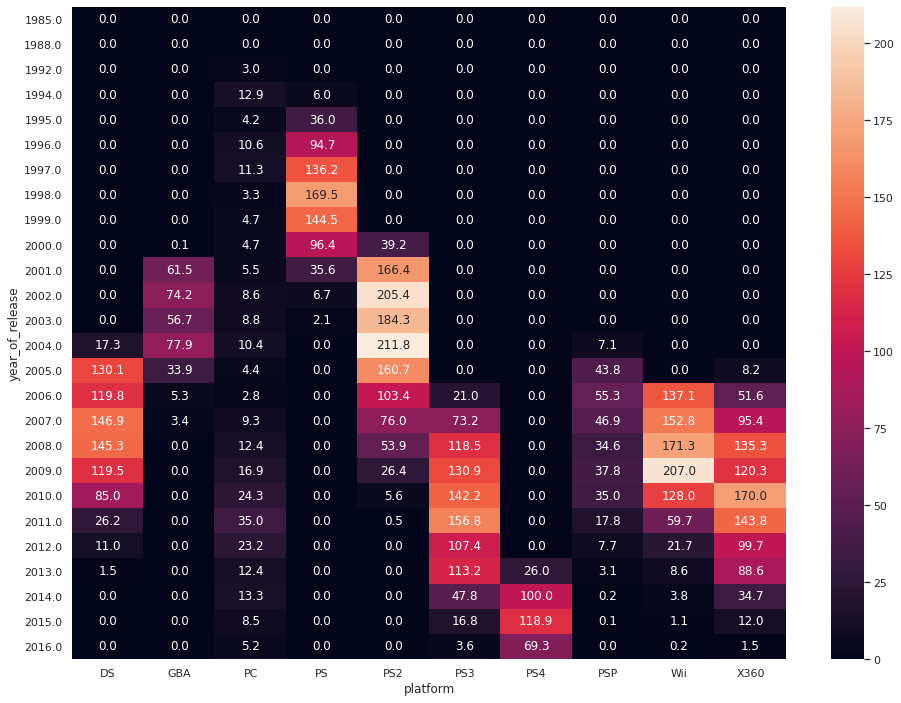

In [27]:
sales_by_ears_t_w_nulls = sales_by_ears_t.fillna(0)
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(sales_by_ears_t_w_nulls, annot=True, fmt=".1f")

In [28]:
sales_by_ears_t.loc[1985.0,'DS']= np.NaN

In [29]:
increase_periods =[]
for col in sales_by_ears_t.columns:
    increase_period = sales_by_ears_t.loc[sales_by_ears_t[col] == sales_by_ears_t[col].max(),col ].index - sales_by_ears_t[col].first_valid_index()
    increase_periods.append(increase_period[0])
    print(f'Платформа = {col} время нарастания = {increase_period[0]}')

Платформа = DS время нарастания = 3.0
Платформа = GBA время нарастания = 4.0
Платформа = PC время нарастания = 26.0
Платформа = PS время нарастания = 4.0
Платформа = PS2 время нарастания = 4.0
Платформа = PS3 время нарастания = 5.0
Платформа = PS4 время нарастания = 2.0
Платформа = PSP время нарастания = 2.0
Платформа = Wii время нарастания = 3.0
Платформа = X360 время нарастания = 5.0


In [30]:
print('медиана роста продаж платформы =',stat.median(increase_periods))
print('срденее роста продаж платформы =',stat.mean(increase_periods))

медиана роста продаж платформы = 4.0
срденее роста продаж платформы = 5.8


срднее на два года отличается от медианы за счет платформы PC, и судя по графику пик их продаж прошел, да и не пик и был..)
пока подытог такой:
1. количество выпускаемых игр за последние годы резко спало в 2012 (т.е. к концу 2016-го - 5 лет назад)
2. минимальное время за которое платформа выходила на свой пик продаж - 2 года
3. максимальное время за которое платформа выходила на свой пик продаж - 5 лет (не считая PC)

выводы:
для поиска "фаворита" в 2017 будем рассматривать период с 2012, потому что в 2012-м был спад выпуска и рост в 2017-м вряд ли будет резким. (это первая причина)

## 3.3. Изучение и выбор нескольких потенциально прибыльных платформ

In [31]:
actdf = df[df['year_of_release']>2011] # от слова 'actual' т.е.  срез для получения актуального датафрейма

### 3.3.1 Поиск лидеров продаж за актуальный период

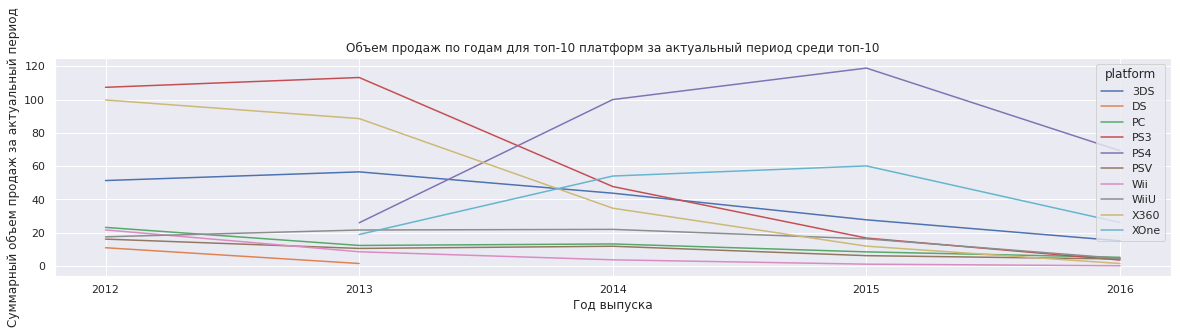

In [32]:
# определим топ-10 за актуальный период
top_10_platforms_by_sales_act = actdf.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(10) # топ-10 платформ по продажам

sales_by_ears_act = actdf[actdf['platform'].isin(top_10_platforms_by_sales_act.index)]\
.pivot_table(index ='platform', columns = 'year_of_release',  values = 'sum_sales' ,  aggfunc = 'sum')

ax = sales_by_ears_act.T.plot(figsize = (20,4),title = 'Объем продаж по годам для топ-10 платформ за актуальный период среди топ-10')
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж за актуальный период')
plt.locator_params(axis="both", integer=True, tight=True) 

кажется в данной выборке роста не предвидится

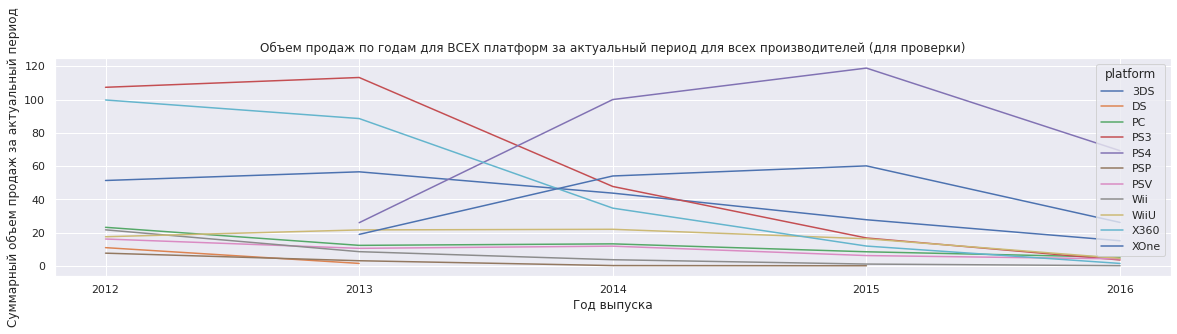

In [33]:
# посмотрим на все платформы из актуального периода, а не только топ-10
sales_by_ears_act = actdf.pivot_table(index ='platform', columns = 'year_of_release',  values = 'sum_sales' ,  aggfunc = 'sum')

ax = sales_by_ears_act.T.plot(figsize = (20,4), grid = True, title = 'Объем продаж по годам для ВСЕХ платформ за актуальный период для всех производителей (для проверки)')
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж за актуальный период')
plt.locator_params(axis="both", integer=True, tight=True) 

получим лучшие платформы из "актуальной" выборки за 2016-й списком

In [34]:
top_5_from_act_df =  actdf.loc[actdf['year_of_release']==2016.0, ['platform','sum_sales']].groupby('platform')['sum_sales'].sum().sort_values( ascending=False).head(5)
top_5_from_act_df

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
Name: sum_sales, dtype: float64

Да, это они же, что и на графике.

При этом - остальные (видно что на графике, что по расчетам) - все в районе 4-х с хвостиком.

**Выводы:** 
1. кажется экономического чуда в индустрии компьютерных игр в 2017-м не предвидится. Все платформы по продажам падают
2. топ платформ состоит из 3-х участников. Остальные похоже что все +- одинаковые

### 3.3.2. Глобальные продажи игр в разбивке по платформам

(0.0, 4.0)

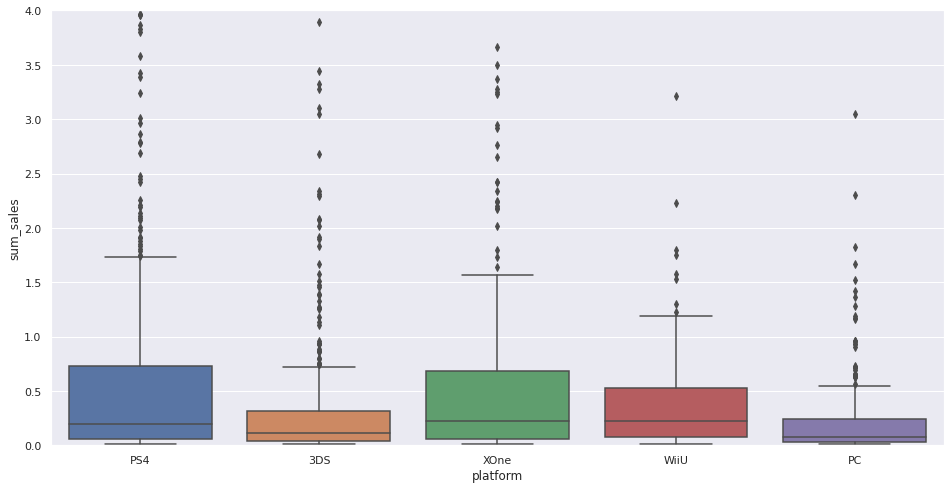

In [35]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.boxplot(x='platform', y="sum_sales", data=actdf[actdf['platform'].isin(top_5_from_act_df.index)])
#ax.set_xlim(left=14, right=20)
ax.set_ylim(bottom=0, top=4)
#ax.plt()

На графиках приведены распределения продаж за "актуальный" период для топ-5 лидеров по продажам платформ.

**Выводы:** 
На данной серии графиков так же видно, что 
1. лидеры все так же PS4 и XOne, но при этом по медиане WiiU превышает 3DS. Это связано с тем что у 3DS в области выбросов лежат отдельные игры, которые поставили эту платформу в тройку лидеров.
2. У PS4 самсые большие выбросы (**суперхиты**). Из-за них эта платформа PS4 **выигрывает по суммарным** продажам **у Xone**.
3. 3DS и PC действуют по принципу "лучше меньше да лучше" и этим выигрывают у WiiU, которая, не смотря на бОльшую медиану, проигрывает им обоим.

### 3.3.3. Влияние на продажи отзывов пользователей и критиков. На примере одной популярной платформы.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>

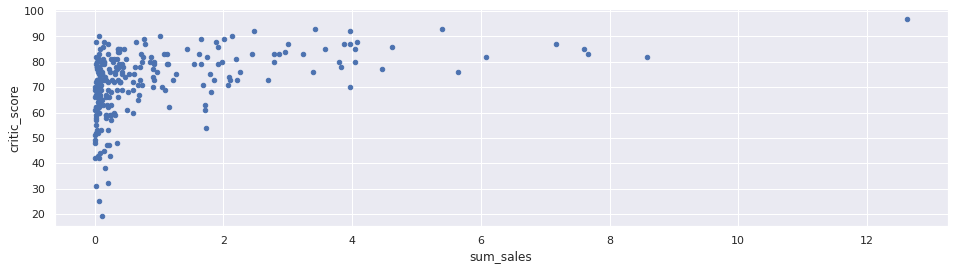

In [36]:
actdf[actdf['platform']=='PS4'].plot(x='sum_sales', y ='critic_score', kind='scatter', figsize=(16,4)) #, xlim=(0,6)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sum_sales', ylabel='user_score'>

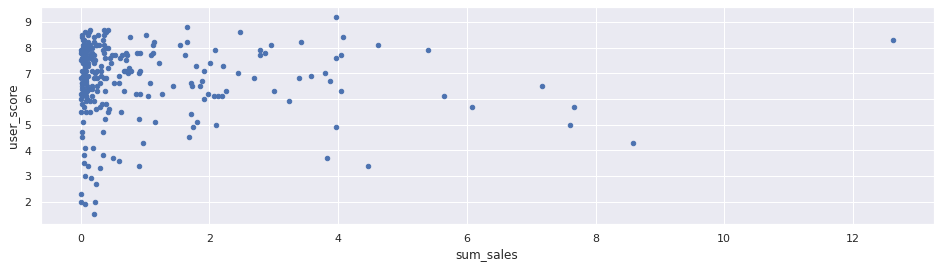

In [37]:
actdf[actdf['platform']=='PS4'].plot(x='sum_sales', y = 'user_score', kind = 'scatter', figsize=(16,4)) #, xlim=(0,6)

In [38]:
print('корреляция между продажами и отзывами критиков равна:', actdf.loc[actdf['platform']=='PS4', 'sum_sales'].corr(actdf.loc[actdf['platform']=='PS4', 'critic_score']))
print('корреляция между продажами и отзывами пользователей равна:', actdf.loc[actdf['platform']=='PS4', 'sum_sales'].corr(actdf.loc[actdf['platform']=='PS4', 'user_score']))

корреляция между продажами и отзывами критиков равна: 0.406567902061781
корреляция между продажами и отзывами пользователей равна: -0.031957110204556376


### 3.3.4. Корреляция на продажи отзывов пользователей и критиков. Другие платформы платформы.

### 3.3.4.1. Корреляция на продажи отзывов пользователей и критиков. Платформа XOne

In [39]:
print('корреляция между продажами и отзывами критиков для XOne равна:', actdf.loc[actdf['platform']=='XOne', 'sum_sales'].corr(actdf.loc[actdf['platform']=='XOne', 'critic_score']))
print('корреляция между продажами и отзывами пользователей для XOne равна:', actdf.loc[actdf['platform']=='XOne', 'sum_sales'].corr(actdf.loc[actdf['platform']=='XOne', 'user_score']))

корреляция между продажами и отзывами критиков для XOne равна: 0.41699832800840175
корреляция между продажами и отзывами пользователей для XOne равна: -0.06892505328279412


In [40]:
print('корреляция между продажами и отзывами критиков для 3DS равна:', actdf.loc[actdf['platform']=='3DS', 'sum_sales'].corr(actdf.loc[actdf['platform']=='3DS', 'critic_score']))
print('корреляция между продажами и отзывами пользователей для 3DS равна:', actdf.loc[actdf['platform']=='3DS', 'sum_sales'].corr(actdf.loc[actdf['platform']=='3DS', 'user_score']))

корреляция между продажами и отзывами критиков для 3DS равна: 0.32080286953607845
корреляция между продажами и отзывами пользователей для 3DS равна: 0.19758263411038596


In [41]:
print('корреляция между продажами и отзывами критиков для 3DS равна:', actdf.loc[actdf['platform']=='WiiU', 'sum_sales'].corr(actdf.loc[actdf['platform']=='WiiU', 'critic_score']))
print('корреляция между продажами и отзывами пользователей для 3DS равна:', actdf.loc[actdf['platform']=='WiiU', 'sum_sales'].corr(actdf.loc[actdf['platform']=='WiiU', 'user_score']))

корреляция между продажами и отзывами критиков для 3DS равна: 0.3483797601201749
корреляция между продажами и отзывами пользователей для 3DS равна: 0.4002190202148617


**Выводы**
1. корреляция между продажами и отзывами критиков низкая, но есть
2. корреляция между продажами и отзывами пользователей в основном отсутствует, за исключением платформы 3DS. Здесь корреляция между отзывами пользователей и продажами даже выше чем для отзывов критиков

### 3.3.5. Распределение игр по жанрам

[Text(0.5, 0, 'Жанр'), Text(0, 0.5, 'Суммарные продажи')]

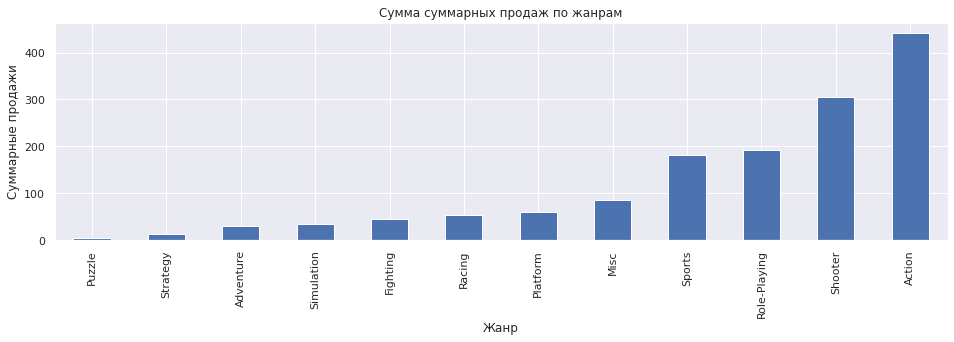

In [42]:
ax = actdf.groupby('genre')['sum_sales'].sum().sort_values().plot(kind='bar', 
                                                                  figsize = (16,4), 
                                                                  grid = True, 
                                                                  title = 'Сумма суммарных продаж по жанрам')
ax.set(xlabel = 'Жанр', ylabel = 'Суммарные продажи')

[Text(0.5, 0, 'Жанр'), Text(0, 0.5, 'Суммарные продажи')]

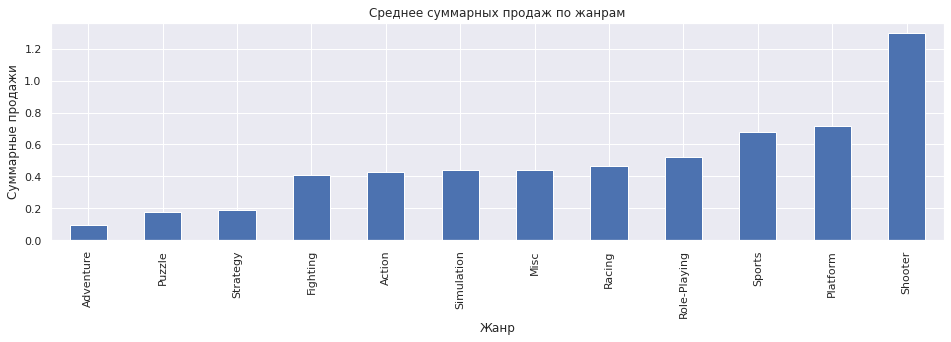

In [43]:
ax = actdf.groupby('genre')['sum_sales'].mean().sort_values().plot(kind='bar', 
                                                                  figsize = (16,4), 
                                                                  grid = True, 
                                                                  title = 'Среднее суммарных продаж по жанрам')
ax.set(xlabel = 'Жанр', ylabel = 'Суммарные продажи')

**Вывод:** 
1. суммарные продажи игр в жанре 'Action', 'Shooter', 'Role-Playing', 'Sports' в топе продаж и превосходят от 2-х до более чем 4 раз
2. при этом в среднем лидерами по суммарным продажам являются "Стрелялки" (Shooter) "Платформеры" (Platform) и "Спорт" (Sport)
3. Shoter в топ-3 как по сумме суммарных продаж, так и по среднему. По любому популярный жанр.

# 4. Портрет пользователя каждого региона

## 4.1 Самые популярные платформы

## 4.1.1 Северная Америка

Посмотрим на продажи в Севреной Америке в перспективе по годам

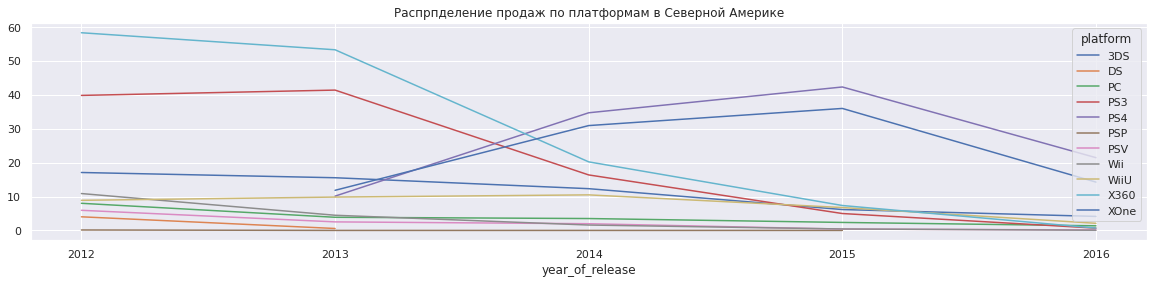

In [44]:
actdf.pivot_table(index = 'platform', columns = 'year_of_release', values = 'na_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распрпделение продаж по платформам в Северной Америке', grid = True)
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

# КОД РЕВЬЮЕРА
plt.locator_params(axis="both", integer=True, tight=True)  

<AxesSubplot:title={'center':'Лидеры продаж в Северной Америке за 2016'}, ylabel='na_sales'>

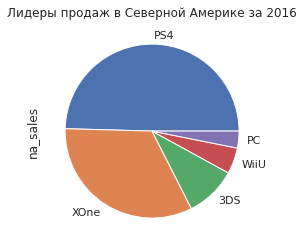

In [45]:
top_5_na_2016 = actdf[actdf['year_of_release']==2016.0].groupby(by='platform')['na_sales'].sum().sort_values(ascending = False).head()
top_5_na_2016.plot(kind = 'pie',  y = top_5_na_2016.index, figsize=(4, 4), title = 'Лидеры продаж в Северной Америке за 2016')

<AxesSubplot:title={'center':'Лидеры продаж в Северной Америке за актуальный период'}, ylabel='na_sales'>

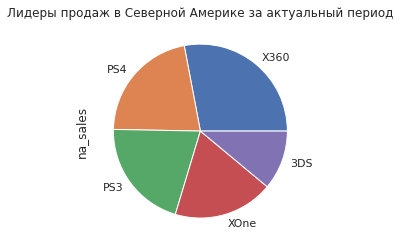

In [46]:
top_5_na_actual_period = actdf.groupby(by='platform')['na_sales'].sum().sort_values(ascending = False).head()
top_5_na_actual_period.plot(kind = 'pie',  y = top_5_na_actual_period.index, figsize=(4, 4), title = 'Лидеры продаж в Северной Америке за актуальный период')

Видно, что, если смотреть налидеров продаж за актуальный период, то это не то же самое, что за последний год

## 4.1.2 Европа

[Text(0.5, 20.200000000000003, 'Год выпуска'),
 Text(20.200000000000003, 0.5, 'Суммарный объем продаж')]

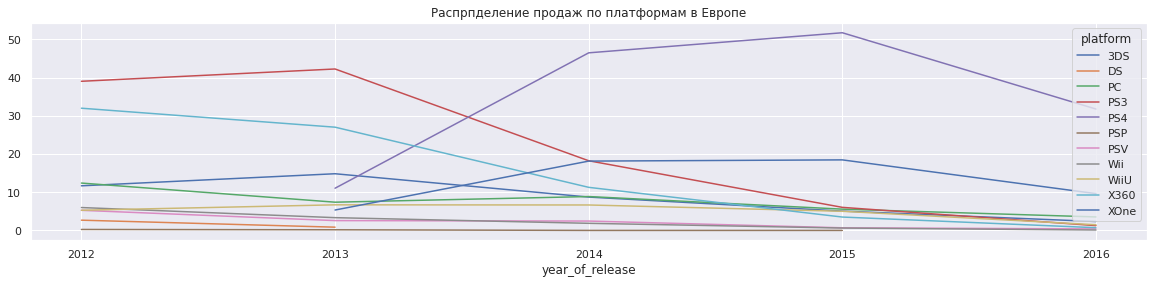

In [47]:
actdf.pivot_table(index = 'platform', columns = 'year_of_release', values = 'eu_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распрпделение продаж по платформам в Европе', grid = True)
plt.locator_params(axis="both", integer=True, tight=True)  
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

Лидеры продаж в Европе за 2016-й год спсиком

<AxesSubplot:title={'center':'Лидеры продаж в Европе за 2016-й год'}, ylabel='eu_sales'>

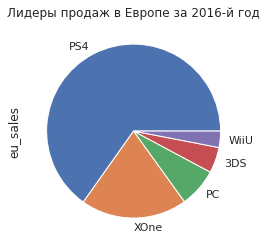

In [48]:
top_5_eu_2016 = actdf[actdf['year_of_release']==2016.0].groupby(by='platform')['eu_sales'].sum().sort_values(ascending = False).head()
top_5_eu_2016.plot(kind = 'pie',  y = top_5_eu_2016.index, figsize=(4, 4), title = 'Лидеры продаж в Европе за 2016-й год')

Список лидеров продаж в Европе за актуальный период

<AxesSubplot:title={'center':'Лидеры продаж в Европе за актуальный период'}, ylabel='eu_sales'>

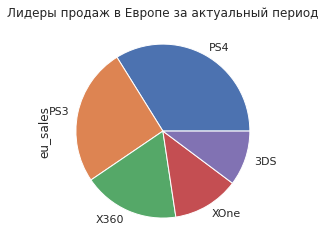

In [49]:
top_5_eu_actual_period = actdf.groupby(by='platform')['eu_sales'].sum().sort_values(ascending = False).head()
top_5_eu_actual_period.plot(kind = 'pie',  y = top_5_eu_actual_period.index, figsize=(4, 4), title = 'Лидеры продаж в Европе за актуальный период')

Вывод тот же - необходимо смотрть срез на 2016 г, т.к. идет спад прдаж у всех, но в 2017-м PS4, XOne, PC вероятно останутся в лидерах. А если смотреть по "актуальному" периоду, то, кроме PS4, можно выбрать PS3 и X360, которые, судя по тренду, в 2017-м будут в аутсайдерах.

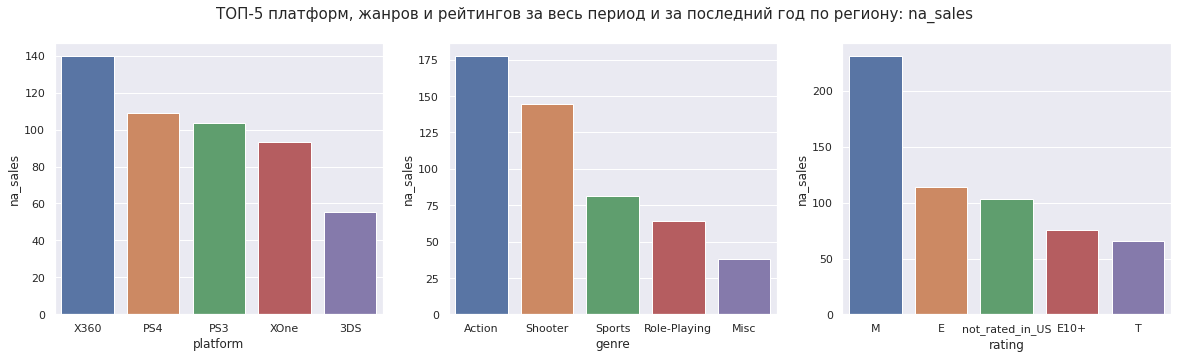

In [50]:
title = 'ТОП-5 платформ, жанров и рейтингов за весь период и за последний год по региону:'
data_column = 'na_sales'

fig, axes = plt.subplots(1, 3, figsize=(20, 5)) # размещаем в 1 строку и 3 столбца
for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):                   
        ppivot_last_year = actdf.pivot_table(
            index=pivot, values=data_column, aggfunc='sum').sort_values(by=data_column, ascending=False).reset_index().rename_axis(None, axis=1).head(5)

        sns.barplot(data=ppivot_last_year, x=pivot, y=data_column, ax=ax)
        fig.suptitle(f'{title} {data_column}', fontsize=15)

plt.show()
sns.set()    

## 4.1.3 Япония

[Text(0.5, 20.200000000000003, 'Год выпуска'),
 Text(807.9647058823531, 0.5, 'Суммарный объем продаж')]

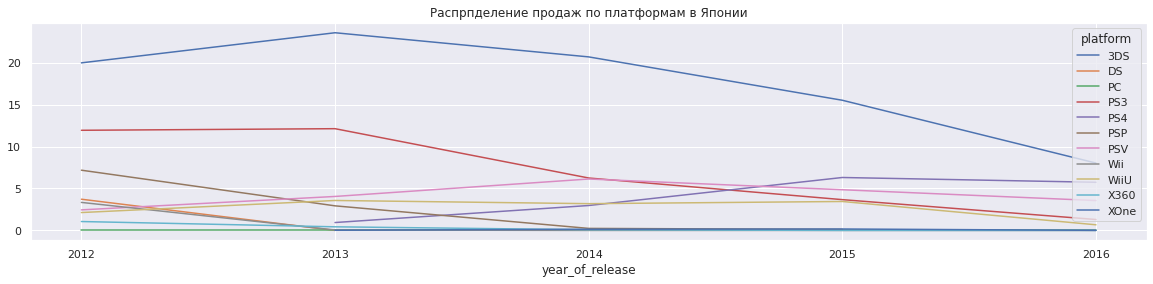

In [51]:
actdf.pivot_table(index = 'platform', columns = 'year_of_release', values = 'jp_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распрпделение продаж по платформам в Японии', grid = True)
plt.locator_params(axis="both", integer=True, tight=True)
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

Лидеры продаж в Японии за 2016-й год спсиком

<AxesSubplot:title={'center':'Лидеры продаж в Японии за 2016'}, ylabel='jp_sales'>

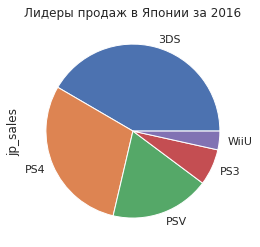

In [52]:
top_5_jp_2016 = actdf[actdf['year_of_release']==2016.0].groupby(by='platform')['jp_sales'].sum().sort_values(ascending = False).head()
top_5_jp_2016.plot(kind = 'pie',  y = top_5_jp_2016.index, figsize=(4, 4), title = 'Лидеры продаж в Японии за 2016')

Список лидеров продаж в Европе за актуальный период

<AxesSubplot:title={'center':'Лидеры продаж в Японии за актуальный период'}, ylabel='jp_sales'>

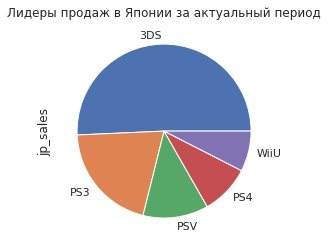

In [53]:
top_5_jp_actual_period = actdf.groupby(by='platform')['jp_sales'].sum().sort_values(ascending = False).head()
top_5_jp_actual_period.plot(kind = 'pie',  y = top_5_jp_actual_period.index, figsize=(4, 4), title = 'Лидеры продаж в Японии за актуальный период')

Промежуточный вывод: 
1. сравнение популярности платформ за период и за год дают разные результаты. В зависимости от задачи надо выбирать и период рассмотрения. Если необходимо планировать продажи на следующий год, то, возможно, имеет смысл смотреть только на предыдущий, т.е.2016 г. И даже с учетом оговорки что данные за 2016-й могут быть не полными, судя по грацикам можно увидеть тренд, и продлив воображаемую линию на 2017-й понять что все же 2016 будет лучше описывать ситуацию.
2. **Самые популярные платформы (топ-5)** - В США, Европе и Японии видны отличия по продажам как при срезе по 2016, так и за период 2012-2016. В вопросе прогнозирования продаж на 2017 наиболее релевантным (как сказано выше) мне предаствляется смотреть на срез по 2016-му году. Отличия  за 2016 г таковы:
 1. в США и Европе первое и второе места занимают PS4 и XOne. а вот третее в США занимает 3DS, а в Европе - PC.
 2. с Японимаей ситуация отличается: 
  - 3DS, которая в США на 3-м месте, а в Европе - на 4-м в Японии занимает 1-е место. 
  - PS4, которая в Штатах и Европе на первом, в Японии - на втором.
  - PSV, котораяни в США ни в Европе не попала в топ-5 в Японии - на 3-м. Видимо Японцы больше проводят времени в общественном транспорте (как вариант)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 отличный вывод
</div>

## 4.2 Самые популярные жанры

### 4.2.1 Северная Америка

[Text(0.5, 20.200000000000003, 'Год выпуска'),
 Text(807.9647058823531, 0.5, 'Суммарный объем продаж')]

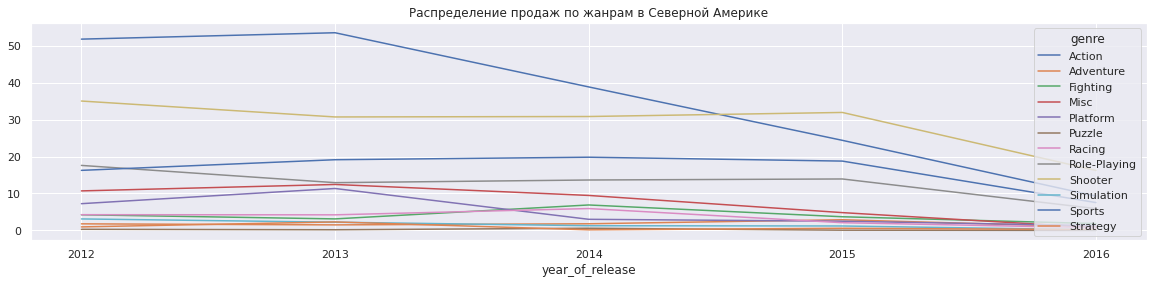

In [54]:
actdf.pivot_table(index = 'genre', columns = 'year_of_release', values = 'na_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распределение продаж по жанрам в Северной Америке', grid = True)
plt.locator_params(axis="both", integer=True, tight=True)
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

Где-то в середине 2014-го в Серверной Америке Action сравнялся по полуярности с Shooter и дальше стал уступать

Лидеры продаж по жанрам в Северной Америке за 2016-й год списком

In [55]:
actdf[(actdf['year_of_release']==2016.0)].groupby(by='genre')['na_sales'].sum().sort_values(ascending = False).head()

genre
Shooter         16.24
Action           9.29
Sports           7.54
Role-Playing     5.89
Fighting         1.84
Name: na_sales, dtype: float64

### 4.2.2 Европа

[Text(0.5, 20.200000000000003, 'Год выпуска'),
 Text(807.9647058823531, 0.5, 'Суммарный объем продаж')]

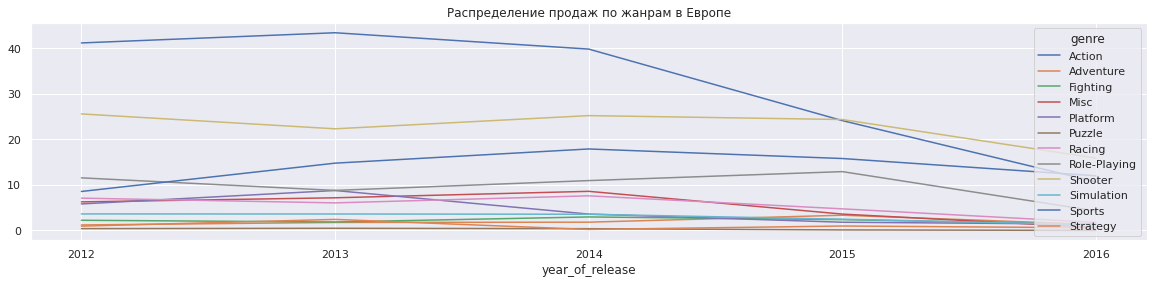

In [56]:
actdf.pivot_table(index = 'genre', columns = 'year_of_release', values = 'eu_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распределение продаж по жанрам в Европе', grid = True)
plt.locator_params(axis="both", integer=True, tight=True)
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

Лидеры продаж по жанрам в Европе за 2016-й год списком

In [57]:
actdf[(actdf['year_of_release']==2016.0)].groupby(by='genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
Shooter         15.90
Sports          12.01
Action          10.68
Role-Playing     4.28
Racing           1.77
Name: eu_sales, dtype: float64

В Европе ситуация аналогичная: в 2015-м Action сравнялся по полуярности с Shooter и дальше стал уступать. И к 2016-му году проиграл даже жанру Sports (в Северной Америке Sports - на 3-м сместе)

### 4.2.3 Япония

[Text(0.5, 20.200000000000003, 'Год выпуска'),
 Text(807.9647058823531, 0.5, 'Суммарный объем продаж')]

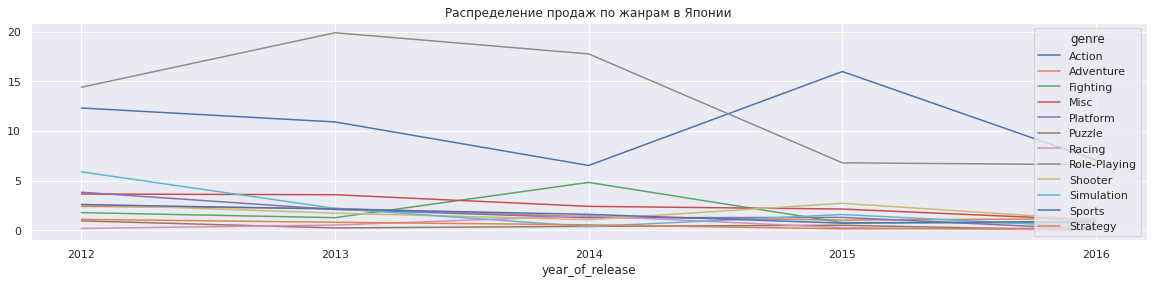

In [58]:
actdf.pivot_table(index = 'genre', columns = 'year_of_release', values = 'jp_sales', aggfunc = 'sum' ).T.plot(figsize = (20,4), title = 'Распределение продаж по жанрам в Японии', grid = True)
plt.locator_params(axis="both", integer=True, tight=True)
ax.set(xlabel = 'Год выпуска', ylabel = 'Суммарный объем продаж')

Лидеры продаж по жанрам в Японии за 2016-й год списком

In [59]:
actdf[(actdf['year_of_release']==2016.0)].groupby(by='genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
Action          7.07
Role-Playing    6.61
Adventure       1.18
Shooter         1.06
Misc            1.04
Name: jp_sales, dtype: float64

А вот в Японии Action Наоборот набрала обороты к 2015, потом сдала позиции, но все же осталась лидером. 2-е и 3-е места заняли жанры не типичные для Серевной Америки и Европы: Role-Playing и Adventure 

### 4.3 Рейтинг ESRB 

### 4.3.1 Северная Америка

In [60]:
actdf.groupby(by='rating')['na_sales'].sum().sort_values(ascending = False).head()

rating
M                  231.57
E                  114.37
not_rated_in_US    103.31
E10+                75.70
T                   66.02
Name: na_sales, dtype: float64

### 4.3.2 Северная Европа

In [61]:
actdf.groupby(by='rating')['eu_sales'].sum().sort_values(ascending = False).head()

rating
M                  193.96
E                  113.03
not_rated_in_US     91.50
E10+                55.37
T                   52.96
Name: eu_sales, dtype: float64

#### 4.3.2.1 Опциональный пункт (личная инициатива). Проверка статистической значимости отличия рейтингов E10+ и T

Проверим статичтически насколько вероятно что в Европе средние продажи для рейтингов E10+ и T отличаются.

In [62]:
rating_E10_eu_sales = actdf.loc[(actdf['rating']=='E10+'), 'eu_sales']
rating_T_eu_sales = actdf.loc[(actdf['rating']=='T'), 'eu_sales']

alpha = 0.05
results = st.ttest_ind(rating_E10_eu_sales, rating_T_eu_sales)

print ('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Средние объемы продаж в Европе для рейтингов E10+ и T отличаются')
else:
    print('Средние объемы продаж в Европе для рейтингов E10+ и T не отличаются')

p-value = 0.006762771094785323
Средние объемы продаж в Европе для рейтингов E10+ и T отличаются


### 4.3.3 Япония

In [63]:
actdf.groupby(by='rating')['jp_sales'].sum().sort_values(ascending = False).head()

rating
not_rated_in_US    108.84
E                   28.33
T                   26.02
M                   21.20
E10+                 8.19
Name: jp_sales, dtype: float64

Вывод: 
1. Похоже что рейтинг ESRB , влияет на продажи. Более точно можно сказать, только проверив статистические гипотезы. Но в Серевной Америке и Европе "M", "E" и "E10+" достаточно сильно отличаются друг от друга. 
2. В Японии в топе игры, по которым ESRB (как ранее говорилось принятый в США) не известен. (Япония и тут на своей волне)

#### 4.3.3.1 Опциональный пункт (личная инициатива). Проверка статистической значимости отличия рейтингов M и E10+

Среди всех рассчитаных выше значений почти везде разница достаточно велика. Но для Японии сумма продаж для рейтинг M и E10+ отличается незначительно. Проверим статичтически насколько вероятно что в Японии средние продажи для рейтингов M и E10+ отличаются.

In [64]:
rating_m_jp_sales = actdf.loc[(actdf['rating']=='M'), 'jp_sales']
rating_e10_jp_sales = actdf.loc[(actdf['rating']=='E10+'), 'jp_sales']

alpha = 0.05
results = st.ttest_ind(rating_m_jp_sales, rating_e10_jp_sales)

print ('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Средние объемы продаж в Японии для рейтингов M и E10+ отличаются')
else:
    print('Средние объемы продаж в Японии для рейтингов M и E10+ не отличаются')

p-value = 0.0400056249277362
Средние объемы продаж в Японии для рейтингов M и E10+ отличаются


#### 4.3.3.2 Опциональный пункт (личная инициатива). Проверка статистической значимости отличия рейтингов E и T

In [65]:
rating_e_jp_sales = actdf.loc[(actdf['rating']=='E'), 'jp_sales']
rating_t_jp_sales = actdf.loc[(actdf['rating']=='T'), 'jp_sales']

alpha = 0.05
results = st.ttest_ind(rating_e_jp_sales, rating_t_jp_sales)

print ('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Средние объемы продаж в Японии для рейтингов E и T отличаются')
else:
    print('Средние объемы продаж в Японии для рейтингов E и T не отличаются')

p-value = 0.6182387403598462
Средние объемы продаж в Японии для рейтингов E и T не отличаются


**вывод по статистическим гипотезам для Японии**


- Средние объемы продаж в Японии для рейтингов M и E10+, для которых суммарные продажи составляют 21.20 и 8.19 млн. проданных копий соответственно,  имеют статистически значимые отличия.
- Средние объемы продаж в Японии для рейтингов E и T, для которых суммарные продажи составляют 28.33 и 26.02 млн. проданных копий  соответственно - не имеют статистически значимых отличий.


# 5. Статистические гипотезы

## 5.1 Гипотеза о различии средних значений пользовательских рейтингов платформ Xbox One и PC

в качестве критерия проверки статистических гипотез здесь, а так же в пунктах 4.3.3.1, 4.3.4.1, 4.3.4.2 применен t-критерий стьюдента для независимых выборкок, поскольку предполагается что 
1. дисперсии выборок одинаковы, т.к. выборки принадлежат одному датасету (у пользователей для оценки были одинаковые условия) и размеры выборок схожи.
2. выборки не вляются парными, т.е. это не одни и теже оценки "до" и "после" исследуемого события. 

Сформулируем гипотезы:

- Н0: средние пользовательские рейтинги платформ Xbox One и PC не отличаются
- H1: средние пользовательские рейтинги платформ Xbox One и PC имеют различие

In [66]:
actdf['user_score'].unique()

array([8.2, 8.1, nan, 5.3, 4.8, 8.3, 2.6, 7.2, 7. , 8.7, 4.3, 6.6, 5.7,
       5. , 6.5, 9.1, 7.3, 6.9, 6.1, 7.9, 6.7, 5.4, 4. , 8.4, 6.4, 3.4,
       8.5, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2, 7.6, 3.7, 4.1, 5.8,
       5.6, 6.8, 5.5, 7.5, 4.4, 5.9, 8.9, 3.9, 8.6, 7.8, 3.2, 8. , 3.1,
       7.4, 6. , 4.7, 7.1, 8.8, 5.1, 3.5, 3. , 2.9, 2.7, 2.2, 5.2, 3.8,
       4.6, 3.3, 9.3, 1.6, 3.6, 2.4, 2.8, 1.8, 1.7, 2.1, 2. , 1.5, 0.7,
       2.5, 0.2, 1.9, 1.3, 1. , 1.4, 2.3])

In [67]:
xone_user_scores = actdf.loc[(actdf['platform']=='XOne') & (~actdf['user_score'].isna()), 'user_score']
pc_user_scores = actdf.loc[(actdf['platform']=='PC') & (~actdf['user_score'].isna()), 'user_score']

alpha = 0.05
results = st.ttest_ind(xone_user_scores, pc_user_scores)

print ('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. средние рейтинги платформ Xbox One и PC отличаются')
else:
    print('Нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не отличаются')

p-value = 0.5535080500643661
Нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не отличаются


## 5.2 Гипотеза о различии средних значений пользовательских рейтингов жанров Action и Sports

Сформулируем гипотезы:

- Н0: средние пользовательские рейтинги жанров Action и Sports не отличаются
- H1: средние пользовательские рейтинги жанров Action и Sports имеют различие

In [68]:
# зададим пороговое значение
action_user_scores = actdf.loc[(actdf['genre']=='Action') & (~actdf['user_score'].isna()), 'user_score']
sports_user_scores = actdf.loc[(actdf['genre']=='Sports') & (~actdf['user_score'].isna()), 'user_score']

alpha = 0.05
results = st.ttest_ind(action_user_scores, sports_user_scores)

print ('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. средние рейтинги жанров Action и Sports отличаются')
else:
    print('Нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не отличаются')

p-value = 3.7163089460934874e-26
Отвергаем нулевую гипотезу. средние рейтинги жанров Action и Sports отличаются


In [69]:
actdf['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

# 6. Общий вывод

**В рамках данного проекта было выполнено:**
1. Предобработка данных
	1. Поиск явных и неявных дублей
	2. Поиск пропусков и невалидных значений (например tbd в critic_score)
	3. Изменение типов
	4. Добавлено значение суммарных продаж по всем регионам (столбец 'sum_sales')
2. Исследовательский анализ данных.
	1. Построены графики "Количество выпущенных в год игр"
    2. Посчитан рейтинг платформ за весь исследуемый период
	3. Посчитано среднее время жизни платформы, а так же 1-й, 2-й и 3-й квартили 
	4. Посчитаны медиана и среднее время роста до своего максимумы продаж для каждой платформы
	5. Был определен актуальный период исследования: 2012 - 2016
	6. Рассчитан список лидеров продаж (топ-10) за актуальный период и за 2016
	7. Построен график продаж по годам для топ-10 платформ за актуальный период
	8. Построен график продаж по годам для всех платформ за актуальный период
	9. Получен топ-5 лидеров продаж за 2016-год
	10. Построены диаграммы "ящик с усами" для топ-5 платформ
	11. Изучено влияние на продажи отзывов пользователей и критиков
	12. Построено распределение игр по жанрам
3. Составлен портрет пользователя каждого региона
	1. Получены портреты пользователей по каждому из представленных регионов. 
	2. Получены портреты пользователей по каждому из представленных жанров. 
	3. Получены портреты пользователей по каждому из представленных рейтингов. 
	4. опционально выборочно протестированы статистические гипотезы о разности среднего числа продаж (среди близких по сумме значений) по жанрам и регионам. 
	5. Проверены обязательные статистические гипотезы
        1. о различии средних значений пользовательских рейтингов платформ Xbox One и PC
        2. о различии средних значений пользовательских рейтингов жанров Action и Sports
    
**По итогу были сделаны следующие выводы:**
1. К 2016-му году для всех платформ продажи шли на спад и судя по тренду выбирать лидеров необходимо из лидеров 2016-го
2. Топ-5 платформ по суммарным продажам (в реальном топе - всего 3. 4,5 места примерно вровень с прочими)
	- PS4     69.25
	- XOne    26.15
	- 3DS     15.14
	- PC       5.25
	- WiiU     4.60
3. Судя по распределениям платформ заметны большие выбросы для лидеров, вероятно это значимо, т.к. 
	1. лидеры все так же PS4 и XOne, но при этом по медиане WiiU превышает 3DS. Это связано с тем что у 3DS в области выбросов лежат отдельные игры, которые поставили эту платформу в тройку лидеров.
	2. У PS4 самсые быольшие выбросы. Из-за них эта платформа так лидирует.
4. Изучены корреляции продаж и отзывов пользователей и критиков. Сделаны выводы:
	1. Корреляция (**в частности линейная зависимость**) между продажами и отзывами критиков низкая, но есть 
	2. Корреляция (**в частности линейная зависимость**) между продажами и отзывами пользователей в основном отсутствует, за исключением платформы 3DS. Здесь корреляция между отзывами пользователей и продажами даже выше чем для отзывов критиков
5. Распределение игр по жанрам показало что в среднем жанры  **Shooter, Platform и Sport**  в топе продаж. (**исправлено**)
6. При изучении портрета пользователей по регионам были сделаны следующие выводы:
	1. сравнение популярности платформ за период и за год дают разные результаты. В зависимости от задачи надо выбирать и период рассмотрения. Если необходимо планировать продажи на следующий год, то, возможно, имеет смысл смотреть только на предыдущий, т.е. 2016 г. И даже с учетом оговорки, что данные за 2016-й могут быть не полными, судя по графикам можно увидеть тренд, и продлив воображаемую линию на 2017-й понять, что все же 2016 будет лучше описывать ситуацию.
	2. Самые популярные платформы (топ-5) - В США, Европе и Японии видны отличия по продажам как при срезе по 2016, так и за период 2012-2016. В вопросе прогнозирования продаж на 2017 наиболее релевантным (как сказано выше) мне предаствляется смотреть на срез по 2016-му году. Отличия за 2016 г таковы:
	3. в США и Европе первое и второе места занимают PS4 и XOne. а вот третее в США занимает 3DS, а в Европе - PC.
	4. с Японимаей ситуация отличается:
		1. 3DS, которая в США на 3-м месте, а в Европе - на 4-м в Японии занимает 1-е место.
		2. PS4, которая в Штатах и Европе на первом, в Японии - на втором.
		3. PSV, котораяни в США ни в Европе не попала в топ-5 в Японии - на 3-м. Видимо Японцы больше проводят времени в общественном транспорте (как вариант)
7. При изучении портрета пользователей по жанрам были сделаны следующие выводы:
	1. В Вопросе прогнозирования на 2017-й год стоит учитывать портрет за 2016-й, т.к. как видно из графиков - лидеры меняются.
	2. Портреты тройки лидеров Серверной Америки и Европы снова похожи, отличие только в порядке 2-го и 3-го места.
        1. Северная Америка:
            1. Shooter
            2. Action           
            3. Sports           
        2. Европа
            1. Shooter
            2. Sports 
            3. Action
	3. В Японии несколько иной список лидеров. ПЕресечение с Европой и Северной Америкой только в Action (который в Яаонии - лидер). Список такой:
        1. Action          
        2. Role-Playing
        3. Adventure       
8. При изучении портрета пользователей по рейтингу ESRB можно сделать следующие выводы:
	1. Портреты пользователей Северной Америки и Европы одинаковы: (**скорректировано**)
        1. M
        2. E
        3. "без рейтинга ESRB"
        4. E10
        5. T
	2. Япония снова отличается: (**скорректировано**)
        1. "без рейтинга ESRB"
        2. E 	26.02
        3. T
        4. M
        5. E10+
	3. При этом выборочно проведена оценка статистической значимости различий и для Японии для рейтингов E  и T (где суммарные продажи составляют 28,33 и 26,02 млн копий) среднее значение продаж рейтинга "E" не имеет статистически значимого отличия от среднего числа продаж для "T", т.е. разница в данном случае не так существенна.
9.  Получены выводы по проверке статистических гипотез:
	1. Средние пользовательские рейтинги платформ Xbox One и PC не отличаются
	2. Средние рейтинги жанров Action и Sports отличаются
	